In [1]:
# -*- coding: utf-8 -*-
# %%python3

# O que vende um carro?

Você é analista na Lista de Eixo de Manivela. Centenas de propagandas gratuitas de veículos são publicadas no seu site todos os dias. Você precisa estudar os dados coletados nos últimos anos e determinar quais fatores influenciaram o preço de um veículo.

Analisar dentro os dados da "Lista de Eixo de Manivela", onde centenas de propagandas gratuitas de veículos que são publicadas no seu site todos os dias.

Serão estudados os dados coletados nos últimos anos para determinar, quais fatores influenciaram o preço de um veículo.

Serão realizados os seguintes passos dentro desta análise

- Leitura do Dataset

- Pré-processamento de dados

- Verificação de valores ausentes e fatores que possam interferir na ausência dos dados, substituição de dados

- Análise exploratória de dados

- Estudo do fator preço entre todas as variáveis da base de dados, valores típicos e atípicos, estudo de dias de propaganda e/ou entre outros fatores para poder responder o que influenciam em seu preço.

## Iniciação

[Carregue bibliotecas que você acredita que são necessárias para o projeto. Você pode perceber depois que você precisa de bibliotecas adicionais conforme você avança, o que é totalmente normal - apenas certifique-se de atualizar essa seção quando perceber isso.]

In [2]:
# Carregando todas as bibliotecas
import pandas as pd

### Carregue dados

[Carregue os dados do projeto e dê uma olhada às informações gerais.]

In [3]:
# Carregue o arquivo com os dados em um DataFrame
try:
    df = pd.read_csv('/datasets/Projeto3/vehicles_us.csv')
except:
    df = pd.read_csv('vehicles_us.csv')

### Explore os dados iniciais

O conjunto de dados contém os seguintes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel etc.
- `odometer` — a quilometragem do veículo quando a propaganda foi publicada 
- `transmission`
- `paint_color`
- `is_4wd` — Se o veículo é 4 por 4 (tipo Booleano)
- `date_posted` — a data que a propaganda foi publicada
- `days_listed` — dias desde a publicação até a retirada

[Entendendo os campos, explore-os para se familiarizar com os dados.]

In [4]:
# imprima as informações gerais/resumidas sobre o DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [5]:
# imprima uma amostragem dos dados
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [6]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [7]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
51520    False
51521    False
51522    False
51523    False
51524    False
Length: 51525, dtype: bool

[Descreva o que você percebeu na informação geral e na amostragem dos dados imprimida. Há algum problema que possa precisar de mais investigação e alterações?]

Percebi que há bastante dados ausentes em algumas colunas como model_year, paint_color e ainda há colunas que tem mais que a metade de dados ausentes como a coluna is_4wd!  Vemos também que não há valores duplicados!

[Essas colunas estão com tipos de dados inapropriados?]

Sim ,há 5 colunas com dados faltantes ,elas são model_year,cylinders,odometer,paint_color e is_4wd !

[Existem valores ausentes em todas as colunas ou apenas em algumas? Quais colunas contêm mais valores ausentes? Descreva brevemente o que você vê em 1-2 frases.]

Não há valores ausentes em todas colunas ,só ha em 5 das 13 colunas. A coluna is_4wd é a coluna com mais valores ausentes !

### Conclusões e próximos passos

[Formule suas conclusões sobre os dados iniciais. O que você acha que parece normal e o que não parece?]

[Explique seus próximos passos e como eles se correlacionam com as conclusões a que você chegou até agora. Especificamente, deve ficar claro quais partes dos dados devem ser tratadas para garantir que eles serão mais adequados para a análise requisitada.]

Percebi que há colunas com muitos dados ausentes, com isso devo analisar os dados para ver se vou eliminar os dados faltantes ou usar a média ou mediana para substituir os valores ausentes!

## Cuide dos valores ausentes (se houver algum)

[Estude os valores ausentes para cada coluna em mais detalhes e decida o que fazer com eles, baseado em hipóteses significativas.]

In [8]:
columns_nan = df.isna().sum()
columns_nan[columns_nan > 0]

model_year      3619
cylinders       5260
odometer        7892
paint_color     9267
is_4wd         25953
dtype: int64

Aqui percebi que tem 5 colunas com muitos dados ausentes 

In [9]:
# Vou começar a tratar coluna por coluna começando pela 'paint_color'

In [10]:
df['paint_color'].value_counts()

paint_color
white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: count, dtype: int64

In [11]:
# Decidi colocar valores ausentes como unknown por optar que a cor do carro não seja importante para o restante da análise

df['paint_color'] = df['paint_color'].fillna('unknown')


Como na coluna de paint_color não é formada por valores ,eu peguei a cor que é mais utilizada nos carros que no caso é a branca e substitui os valores ausentes pela cor branca!

In [12]:
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,unknown,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,unknown,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [13]:
# coluna 'is_4wd '

In [14]:
df['is_4wd']

0        1.0
1        1.0
2        NaN
3        NaN
4        NaN
        ... 
51520    NaN
51521    NaN
51522    NaN
51523    NaN
51524    NaN
Name: is_4wd, Length: 51525, dtype: float64

In [15]:
# Coluna 'is_4wd ' 
# Pelo fato de ser um dado com que se trata apenas de serem entre valores de 0 ou 1, 
# Tornarei os valores nulos igual a 0, no caso, não os considerando como 4x4

In [16]:
df['is_4wd'] = df['is_4wd'].fillna(0)

In [17]:
df['is_4wd'].isna().sum()

0

In [18]:
df.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,unknown,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


In [19]:
# Coluna 'model_year'---------------------------------

In [20]:
# Fiz uma nova tabela com type , model e model year busando encontrar qual depende mais de outro
aux_model_year = df.pivot_table(index='type', columns='model', values='model_year')
aux_model_year

model,acura tl,bmw x5,buick enclave,cadillac escalade,chevrolet camaro,chevrolet camaro lt coupe 2d,chevrolet colorado,chevrolet corvette,chevrolet cruze,chevrolet equinox,...,toyota camry le,toyota corolla,toyota highlander,toyota prius,toyota rav4,toyota sienna,toyota tacoma,toyota tundra,volkswagen jetta,volkswagen passat
type,,,,,,,,,,,,,,,,,,,,,
SUV,2007.000000,2009.162996,2012.253061,2008.483986,NaN,NaN,NaN,NaN,2012.000000,2013.215292,...,2007.000000,NaN,2008.862876,2007.000000,2009.830467,2007.750000,2010.000000,2002.000000,NaN,NaN
bus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
convertible,NaN,NaN,NaN,NaN,2007.962500,NaN,NaN,1998.007407,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
coupe,NaN,NaN,NaN,NaN,2008.627063,2015.887372,NaN,1996.855738,2013.600000,NaN,...,2000.000000,1997.571429,NaN,2010.000000,NaN,NaN,NaN,NaN,2009.111111,2014.000000
hatchback,NaN,2001.000000,NaN,NaN,NaN,NaN,NaN,1990.230769,2017.062500,2012.000000,...,NaN,2004.500000,NaN,2009.495385,2015.000000,NaN,NaN,NaN,2011.000000,2006.666667
mini-van,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006.000000,...,NaN,NaN,NaN,NaN,NaN,2008.739130,NaN,NaN,NaN,NaN
offroad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2011.111111,2009.333333,NaN,NaN
other,2006.000000,NaN,NaN,NaN,2001.800000,NaN,2014.500000,1993.571429,2014.000000,2016.750000,...,NaN,2011.625000,2008.000000,2013.500000,2008.000000,NaN,NaN,NaN,NaN,2014.000000
pickup,NaN,NaN,NaN,2009.888889,NaN,NaN,2010.988372,NaN,NaN,NaN,...,NaN,2015.000000,NaN,2001.000000,2003.000000,2005.000000,2009.117647,2008.577143,NaN,NaN


In [21]:
df['aux_model_year'] = df['model_year'].fillna(df['model_year'].mode()[0])

In [22]:
def aux_fill_mod_year(model,tipo):
    try:
        return aux_model_year[model][tipo]
    except:
        return 'erro'

In [23]:
df['mode_model_year'] = df.apply(lambda row: aux_fill_mod_year(row['model'],row['type']),axis=1)
df['mode_model_year']

0        2009.162996
1        2008.442055
2        2011.411899
3        2008.442055
4        2013.754808
            ...     
51520    2009.579767
51521    2009.603738
51522    2011.411899
51523    2010.308621
51524    2012.073276
Name: mode_model_year, Length: 51525, dtype: float64

In [24]:
df['model_year'].mode()

0    2013.0
Name: model_year, dtype: float64

In [25]:
(df['mode_model_year'] == 'erro').sum()

0

In [26]:
df['mode_model_year'].isna().sum()

10

In [27]:
#verificando se ausencia de dados persistem
df['mode_model_year'] = df['mode_model_year'].fillna(2014)
df['mode_model_year'].isna().sum()

0

In [28]:
df['model_year'] = df['model_year'].fillna(df['mode_model_year'])

In [29]:
df.isna().sum()  # ainda faltam duas colunas para serem arrumadas

price                 0
model_year            0
model                 0
condition             0
cylinders          5260
fuel                  0
odometer           7892
transmission          0
type                  0
paint_color           0
is_4wd                0
date_posted           0
days_listed           0
aux_model_year        0
mode_model_year       0
dtype: int64

In [30]:
# Coluna "cylinders"

In [31]:
df.pivot_table(index='type', columns='model', values='cylinders')

model,acura tl,bmw x5,buick enclave,cadillac escalade,chevrolet camaro,chevrolet camaro lt coupe 2d,chevrolet colorado,chevrolet corvette,chevrolet cruze,chevrolet equinox,...,toyota camry le,toyota corolla,toyota highlander,toyota prius,toyota rav4,toyota sienna,toyota tacoma,toyota tundra,volkswagen jetta,volkswagen passat
type,,,,,,,,,,,,,,,,,,,,,
SUV,6.000000,6.379310,6.0,7.985816,NaN,NaN,NaN,NaN,4.000000,4.425963,...,4.000000,NaN,5.777003,NaN,4.338308,5.500000,6.000000,8.000000,NaN,NaN
bus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
convertible,NaN,NaN,NaN,NaN,6.533333,NaN,NaN,7.985612,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
coupe,NaN,NaN,NaN,NaN,6.993056,6.0,NaN,8.000000,4.000000,NaN,...,6.000000,4.000000,NaN,4.000000,NaN,NaN,NaN,NaN,4.125000,4.000000
hatchback,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,8.000000,4.000000,4.000000,...,NaN,4.000000,NaN,4.003226,4.000000,NaN,NaN,NaN,4.000000,4.666667
mini-van,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,...,NaN,NaN,NaN,NaN,NaN,5.945355,NaN,NaN,NaN,NaN
offroad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,8.000000,NaN,NaN
other,6.000000,NaN,NaN,NaN,6.333333,NaN,4.000000,8.000000,4.000000,4.000000,...,NaN,4.000000,6.000000,4.000000,4.000000,NaN,NaN,NaN,4.000000,4.000000
pickup,NaN,NaN,NaN,8.000000,NaN,NaN,4.855556,NaN,NaN,NaN,...,NaN,4.000000,NaN,4.000000,4.000000,NaN,5.219355,7.893491,NaN,NaN


In [32]:
df['cylinders'].mode()

0    8.0
Name: cylinders, dtype: float64

In [33]:
def mode_cylinder(model,tipo):
    try:
        return aux_cylinders[model][tipo]
    except:
        return 'erro'

In [34]:
df['mode_cylinder'] = df.apply(lambda row: mode_cylinder(row['model'],row['type']),axis=1)

In [35]:
(df['mode_cylinder'] == 'erro').sum()

51525

In [36]:
df['mode_cylinder'] = df['mode_cylinder'].fillna(8)

In [37]:
df['cylinders'] = df['cylinders'].fillna(df['mode_cylinder'])

In [38]:
#verificando se erros ausentes persistem
df['cylinders'].isna().sum()

0

In [39]:
df.isna().sum()

price                 0
model_year            0
model                 0
condition             0
cylinders             0
fuel                  0
odometer           7892
transmission          0
type                  0
paint_color           0
is_4wd                0
date_posted           0
days_listed           0
aux_model_year        0
mode_model_year       0
mode_cylinder         0
dtype: int64

In [40]:
# Coluna "odometer"

In [41]:
aux_odometer = df.pivot_table(index=['type','model'],columns='condition',values='odometer',aggfunc='median')
aux_odometer

condition                      excellent      fair      good  like new  new  \
type  model                                                                   
SUV   acura tl                       NaN       NaN  127000.0       NaN  NaN   
      bmw x5                    100106.0  129584.0  133113.0  103000.0  NaN   
      buick enclave             114856.0  189769.0  116500.0   84769.0  NaN   
      cadillac escalade         123000.0  220000.0  148000.0   77512.0  NaN   
      chevrolet cruze                NaN       NaN     158.0       NaN  NaN   
...                                  ...       ...       ...       ...  ...   
wagon ford taurus                    NaN       NaN   68631.5       NaN  NaN   
      hyundai elantra           151000.0       NaN       NaN       NaN  NaN   
      volkswagen jetta          143964.0       NaN  144000.0       NaN  NaN   
      volkswagen passat         145000.0  229000.0  124698.0  132428.0  NaN   
      chrysler town & country        NaN       NaN   94000.0       NaN  NaN   

condition                       salvage  
type  model                              
SUV   acura tl                      NaN  
      bmw x5                        NaN  
      buick enclave                 NaN  
      cadillac escalade        108000.0  
      chevrolet cruze               NaN  
...                                 ...  
wagon ford taurus                   NaN  
      hyundai elantra               NaN  
      volkswagen jetta              NaN  
      volkswagen passat        221000.0  
      chrysler town & country       NaN  

[461 rows x 6 columns]

In [42]:
def aux_fill_odom(condition,tipo,model):
    try:
        return aux_odometer[condition][tipo][model]
    except: 
        return 'erro'

In [43]:
aux_fill_odom(2,'SUV','bmw x5')

'erro'

In [44]:
df['median_odometer'] = df.apply(lambda row: aux_fill_odom(row['condition'],row['type'],row['model']),axis=1)

In [45]:
(df['median_odometer'] == 'erro').sum()


56

In [46]:
df['odometer'].median()

113000.0

In [47]:
df['median_odometer'] = df['median_odometer'].replace('erro',113000.0)

In [48]:
(df['median_odometer'] == 'erro').sum()

0

In [49]:
df['median_odometer'] = df.apply(lambda row: aux_fill_odom(row['condition'],row['type'],row['model']),axis=1)

In [50]:
#verificando se ausencia de dados persistem
df['median_odometer'].isna().sum()

45

In [51]:
#tratando erros ausentes faltantes
df['median_odometer'] = df['median_odometer'].fillna(113000.0)

In [52]:
#verificando se erros ausentes persistem
df['median_odometer'].isna().sum()

0

In [53]:
df['odometer'] = df['odometer'].fillna(df['median_odometer'])

In [54]:
df.isna().sum()

price              0
model_year         0
model              0
condition          0
cylinders          0
fuel               0
odometer           0
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
aux_model_year     0
mode_model_year    0
mode_cylinder      0
median_odometer    0
dtype: int64

In [55]:
df['odometer'] = pd.to_numeric(df['odometer'], errors='coerce').astype('float')

## Corrija os tipos de dados

[Como os dados estão mais ou menos completos agora, corrija os tipos de dados se necessário.]

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            51525 non-null  int64  
 1   model_year       51525 non-null  float64
 2   model            51525 non-null  object 
 3   condition        51525 non-null  object 
 4   cylinders        51525 non-null  object 
 5   fuel             51525 non-null  object 
 6   odometer         51469 non-null  float64
 7   transmission     51525 non-null  object 
 8   type             51525 non-null  object 
 9   paint_color      51525 non-null  object 
 10  is_4wd           51525 non-null  float64
 11  date_posted      51525 non-null  object 
 12  days_listed      51525 non-null  int64  
 13  aux_model_year   51525 non-null  float64
 14  mode_model_year  51525 non-null  float64
 15  mode_cylinder    51525 non-null  object 
 16  median_odometer  51525 non-null  object 
dtypes: float64(5

In [57]:
#Alterando o tipo de dados de float para inteiros para segmento de anos do carro
df['model_year'] = df['model_year'].astype(int)

In [58]:
#Alterando a coluna "date_posted" str para int 
df['date_posted'] = pd.to_datetime(df['date_posted'], format= '%Y-%m-%d')

In [59]:
#Alterando o tipo de dados de int para float em 'price'
df['price'] = pd.to_numeric(df['price'], errors='coerce').astype('float')

In [60]:
#Alterando o tipo de dados de float para bolean em 'is_4wd'
df['is_4wd'] = df['is_4wd'].astype(bool)

In [61]:
# Transformei os valores da coluna que eram float em int64 porque na prática eles não tinham decimais !
df['cylinders'] = pd.to_numeric(df['cylinders'], errors='coerce').astype('Int64')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            51525 non-null  float64       
 1   model_year       51525 non-null  int32         
 2   model            51525 non-null  object        
 3   condition        51525 non-null  object        
 4   cylinders        46265 non-null  Int64         
 5   fuel             51525 non-null  object        
 6   odometer         51469 non-null  float64       
 7   transmission     51525 non-null  object        
 8   type             51525 non-null  object        
 9   paint_color      51525 non-null  object        
 10  is_4wd           51525 non-null  bool          
 11  date_posted      51525 non-null  datetime64[ns]
 12  days_listed      51525 non-null  int64         
 13  aux_model_year   51525 non-null  float64       
 14  mode_model_year  51525 non-null  float

Todos os dados ausentes foram corrigidos usando a mediana dos valores ou a cor mais frequente dos carros 

## Enriqueça os dados

[Adicione fatores adicionais aos dados para tornar a análise mas fácil.]

In [63]:
# Adicione valores data/hora para quando a propaganda estiver colocada
df['date_posted_day'] = df['date_posted'].dt.day
df['date_posted_month'] = df['date_posted'].dt.month
df['date_posted_year'] = df['date_posted'].dt.year
# Com esses dados descobri o dia ,mês e ano das postagens das propagandas

In [64]:
# Adicione a idade do veículo quando a propaganda for colocada
df['veiculo_age'] = df['date_posted_year'] - df['model_year'] + 1
# Conheci a idade dos veículos quando a postagem for feita

In [65]:
# Adicione a quilometragem média por ano
df['quilometragem'] =  df['veiculo_age'] / df['odometer']
# Encontrei a quilometragem média dos carros

In [66]:
# Isso deve ajudar a substituir os valores condicionais por alguma coisa que pode ser manipulada mais facilmente

d = {'new': 5,
    'like new': 4,
    'excellent': 3,
    'good': 2,
    'fair': 1,
    'salvage': 0}
df['condition'] = df['condition'].map(d)

## Verifique os dados limpos

[Já que os dados estão prontos para a análise, dê apenas uma rápida olhada neles. É útil ver o que exatamente você vai usar para a análise.]

In [67]:
# imprima as informações gerais/resumidas sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   price              51525 non-null  float64       
 1   model_year         51525 non-null  int32         
 2   model              51525 non-null  object        
 3   condition          51525 non-null  int64         
 4   cylinders          46265 non-null  Int64         
 5   fuel               51525 non-null  object        
 6   odometer           51469 non-null  float64       
 7   transmission       51525 non-null  object        
 8   type               51525 non-null  object        
 9   paint_color        51525 non-null  object        
 10  is_4wd             51525 non-null  bool          
 11  date_posted        51525 non-null  datetime64[ns]
 12  days_listed        51525 non-null  int64         
 13  aux_model_year     51525 non-null  float64       
 14  mode_m

In [68]:
# imprima uma amostragem dos dados

df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,days_listed,aux_model_year,mode_model_year,mode_cylinder,median_odometer,date_posted_day,date_posted_month,date_posted_year,veiculo_age,quilometragem
0,9400.0,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unknown,...,19,2011.0,2009.162996,erro,133113.0,23,6,2018,8,0.000055
1,25500.0,2008,ford f-150,2,6,gas,88705.0,automatic,pickup,white,...,50,2013.0,2008.442055,erro,153000.0,19,10,2018,11,0.000124
2,5500.0,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,...,79,2013.0,2011.411899,erro,69500.0,7,2,2019,7,0.000064
3,1500.0,2003,ford f-150,1,8,gas,203000.0,automatic,pickup,unknown,...,9,2003.0,2008.442055,erro,203000.0,22,3,2019,17,0.000084
4,14900.0,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,...,28,2017.0,2013.754808,erro,87767.0,2,4,2019,3,0.000037


## Estude os parâmetros fundamentais

[Escolha uma abordagem apropriada para estudar os parâmetros listados abaixo, preste atenção especial a como os valores atípicos afetam a forma e a legibilidade dos histogramas.]

Os parâmetros são
- Preço
- A idade do veículo quando a propaganda foi colocada
- Quilometragem
- Número de cilindros
- Condição

[Se você achar que precisa repetir o mesmo trabalho várias vezes, pense a respeito de qual instrumento de codificação será útil para tal tarefa pera evitar duplicamentos no seu código.]

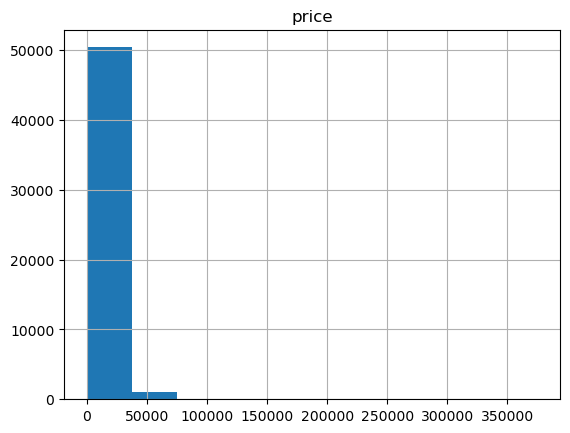

In [69]:
# Nesse histograma podemos ver que há muitos preços de carros próximos de 0 aproximando a 50000 
df.hist(column=['price']);

Dentro dos dados referentes ao preço dos veículos percebemos que o maior volume e valores esta dentro da faixa de preço de 0 a 50000, temos sim demais valores que pelo histograma percebemos que são outliers

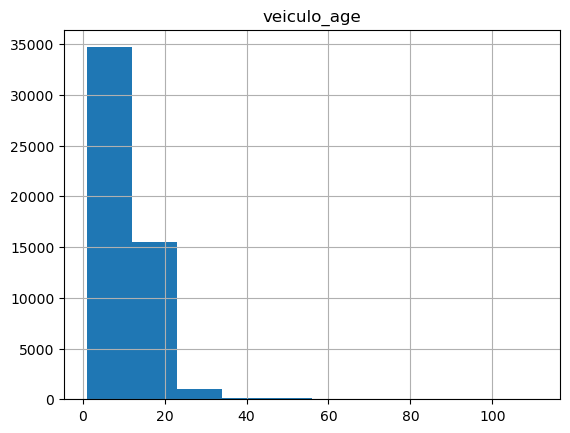

In [70]:
# Percebe-se que há um grande venda de carros com idades aproximada de 0 a 10 anos ,depois carros com as idades maiores de de 20, 30 e 40 diminui a demanda de carros !
df.hist(column=['veiculo_age']);


Na variável idade do carro, verificamos que dados de massa se acumulam dentro de 0 a 30 anos aproximadamente, mostrando outliers acima de 30

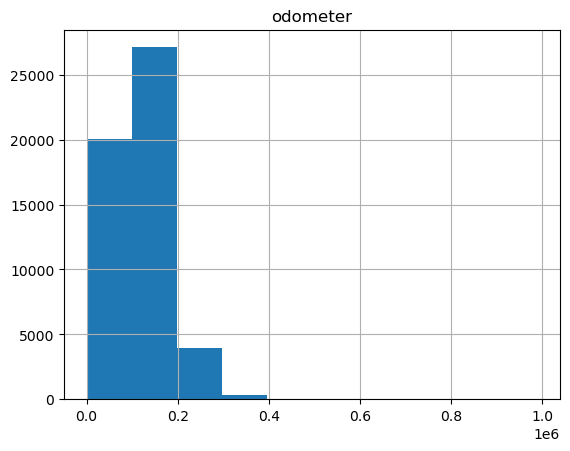

In [71]:
# Podemos ver que no gráfico há muita demanda com 0,0 de odometro
df.hist(column=['odometer']);

Sobre os dados do odometro inicialmente dentro dos gráficos de histograma, percebemos que a maior massa de dados concentrado em cerca de 10k(Kilometros), e os outliers já se apresentam acima de 20k.

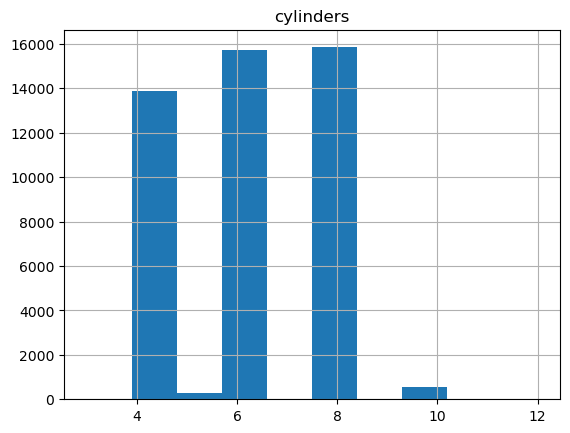

In [72]:
# Esse gráfico nos mostra que clindros com 8 são os que mais tem demanda
df.hist(column=['cylinders']);

Os dados inicialmente sobre cilindros que se apresentam nos dois gráficos, percebemos que possui um padrão crescente que vai de 4 a 8 cilindros, e a mediana se mostra em 6 cilindros.

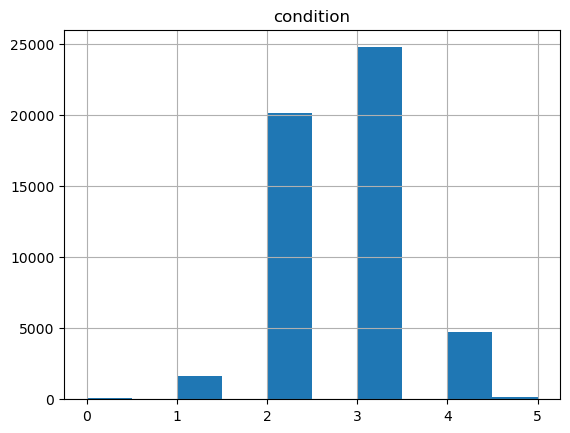

In [73]:
# Podemos observar que a condição 3 é a mais procurada ,sucedendo vem a 2 
df.hist(column=['condition']);

Os dados inicialmente sobre cilindros que se apresentam nos dois gráficos, percebemos que possui um padrão crescente que vai de 4 a 8 cilindros, e a mediana se mostra em 6 cilindros.

## Estude e cuide dos valores ausentes

[Dado os resultados acima, determine quais colunas devem conter valores atípicos, e crie um DataFrame sem aqueles valores atípicos. Dica: Valores atípicos podem ser identificados se você definir os limites inferior/superior para intervalos normais de valores.]

In [74]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1

# Determine o limite inferior para valores atípicos
limit_inf = q1 - 1.5*iqr

# Determine o limite superior para valores atípicos
limi_sup = q1 + 1.5*iqr

# Armazene os dados sem os valores atípicos em um DataFrame separado

df_price = df.loc[(df['price'] > limit_inf) & (df['price'] < limi_sup), :]

In [75]:
q1 = df['odometer'].quantile(0.25)
q3 = df['odometer'].quantile(0.75)
iqr = q3 - q1

# Determine o limite inferior para valores atípicos
limit_inf = q1 - 1.5*iqr

# Determine o limite superior para valores atípicos
limi_sup = q1 + 1.5*iqr

# Armazene os dados sem os valores atípicos em um DataFrame separado

df_odometer = df.loc[(df['odometer'] > limit_inf) & (df['odometer'] < limi_sup), :]

In [76]:
q1 = df['veiculo_age'].quantile(0.25)
q3 = df['veiculo_age'].quantile(0.75)
iqr = q3 - q1

# Determine o limite inferior para valores atípicos
limit_inf = q1 - 1.5*iqr

# Determine o limite superior para valores atípicos
limi_sup = q1 + 1.5*iqr

# Armazene os dados sem os valores atípicos em um DataFrame separado

df_veiculo_age = df.loc[(df['veiculo_age'] > limit_inf) & (df['veiculo_age'] < limi_sup), :]

## Estude os parâmetros fundamentais sem valores atípicos

[Use os dados filtrados para fazer novos gráficos. Compare com os anteriores (que incluem os valores atípicos). Tire conclusões para cada um.]

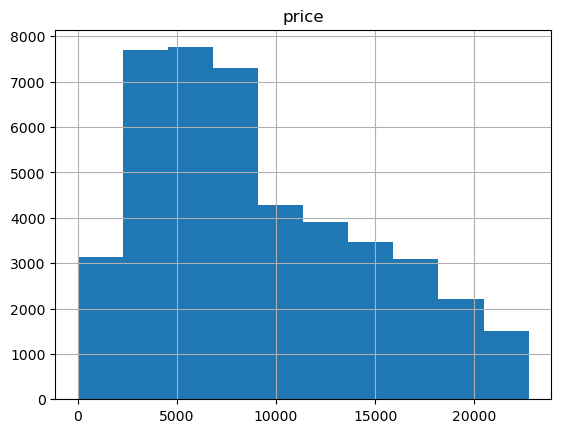

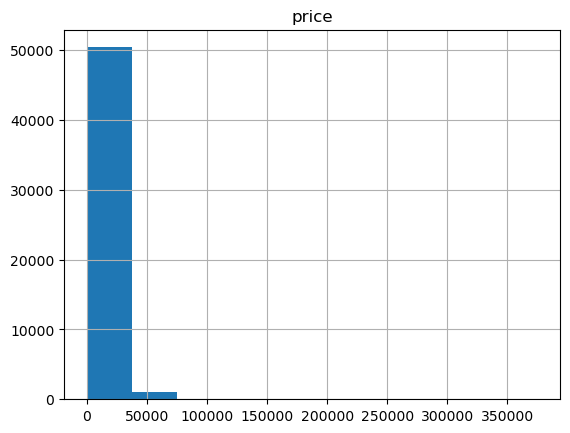

In [77]:
df_price.hist(column=['price']);
df.hist(column=['price']);

# Podemos ver que houve um fatiamento do histograma de preço fazendo com que o pico agora esteja entre 4900 a 6000!

É perceptível até este dado ponto, que na variável preço em seus valores integrais, possui dados outliers que chega a distorcer o gráfico histograma não viabilizando uma melhor análise de dados, já trazendo somente o dataset com dados dentro dos limites inferior e superior, podemos perceber que a maior massa de preços se acumulam em ≅ 4.000 a 9.000, a dispersão dos dados diminuiu cerca de ≅ 3000 pontos, ainda podemos perceber que o valor mínimo entre ambos dataset, ainda consiste em 1 dolar.

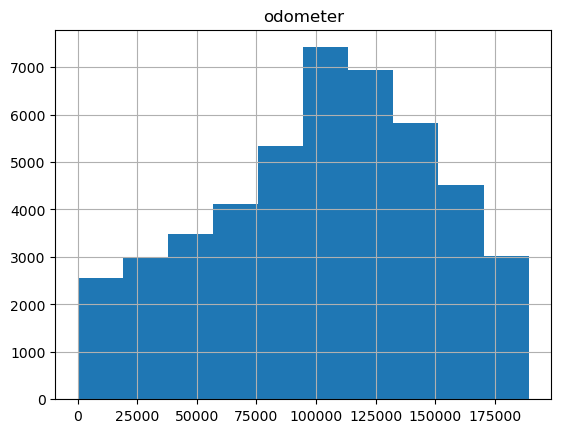

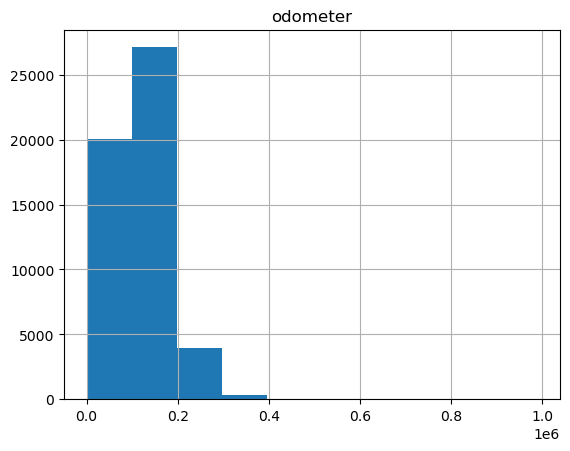

In [78]:
df_odometer.hist(column=['odometer']);
df.hist(column=['odometer']);

# Após filtrar os dados nós fatiamos e o pico fica em torno de 0 a 2000 e mostrando que há mais valores que grandes comparados ao gráfico antigo

Nos dois gráficos é perceptível ver que a onda maior é no início ,mas com a mudança houve dispersão nos dados fazendo um novo gráfico,mas o pico continua no início e tendo uma distribuição maior no decorrer do gráfico ,coisa que não acontecia no primeiro gráfico! 

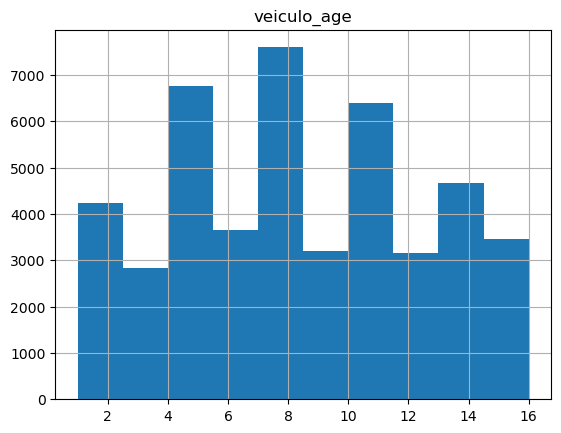

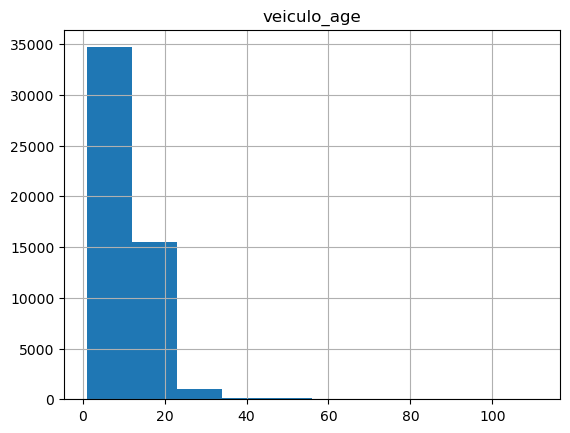

In [79]:
df_veiculo_age.hist(column=['veiculo_age']);
df.hist(column=['veiculo_age']);
# O pico da idade de veículos é entre 7 e 8 saindo do 0 que estava antes 

Quando verificamos os dois histogramas, dentro desta maior massa de dados, percebemos duas maiores ondas que são veículos postados com idade em pico ≅ 7 anos e outra onda com pico ≅ entre 11 e 12 anos, já realizando uma comparação com preço é perceptível verificar que o maior preço estão entre os carros mais novos e ao longo dos anos o valor vai caindo o que é um movimento normal, sendo que o veículo vai ficando mais velho, porém vemos uma curva ascendente no grafico de disperção em carros de idade ≅ 40 a 60 anos.

## Tempo de vida das propagandas

[Estude quantos dias propagandas foram exibidas (`days_listed`). Calcule a média e a mediana. Descreva o tempo de vida útil comum de uma propaganda. Determine quando as propagandas foram removidas rapidamente, e quando elas foram listadas por um tempo anormalmente longo.]

In [80]:
# Aqui descobri a média = mean e a mediana = 50% 
df['days_listed'].describe()

count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64

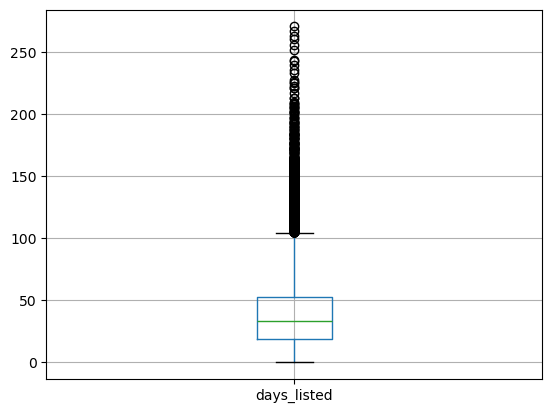

In [81]:
df.boxplot(column=['days_listed']);

In [82]:
# Determine o limite inferior para valores atípicos
#calculo dos quartil
q1 = df['days_listed'].quantile(0.25)
q3 = df['days_listed'].quantile(0.75)
iqr = q3 - q1 

In [83]:
#calculo limites
lim_inf = q1 - 1.5*iqr
lim_sup = q3 + 1.5*iqr

In [84]:
#criando novo data frame price para verificação de valores dentro de quartis q1 e q3
dfdays_list = df[(df['days_listed'] > lim_inf) & (df['days_listed'] < lim_sup)]

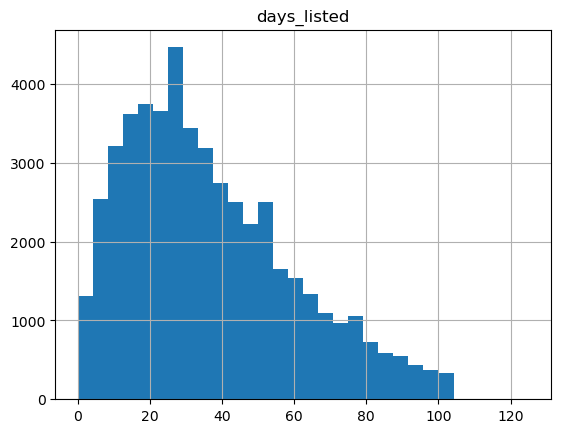

In [85]:
#gerando grafico histograma
dfdays_list.hist(column=['days_listed'],bins=30,range=(0,125));

In [86]:
#verificando a média
round(dfdays_list['days_listed'].mean(),2)

36.56

In [87]:
#verificando a mediana
round(dfdays_list['days_listed'].median(),2)

32.0

In [88]:
#gerando dataframe com propagandas curtas
short_days = df[df['days_listed'] < q1]

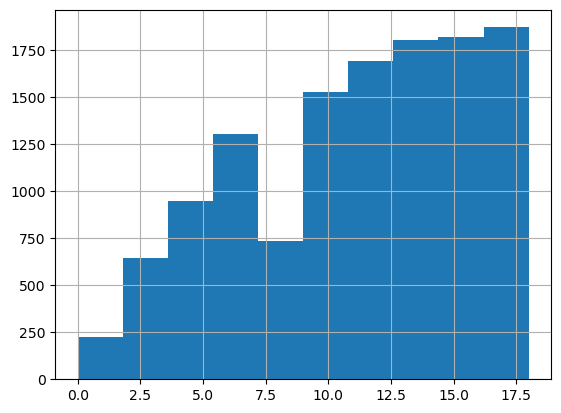

In [89]:
#visualizando dados com histograma
short_days['days_listed'].hist();

Podemos ver que as propagandas com dias curtos são de no máximo 18 dias, sendo que a média é de 11,entre a postagem e a retirada

In [90]:
#Verificando a distribuição de anúncios curtos
short_days['days_listed'].describe()

count    12561.000000
mean        11.129050
std          4.681681
min          0.000000
25%          8.000000
50%         12.000000
75%         15.000000
max         18.000000
Name: days_listed, dtype: float64

In [91]:
#fatiando a variável days_listed para análise de progragandas longas
long_days = df[df['days_listed'] > q3]

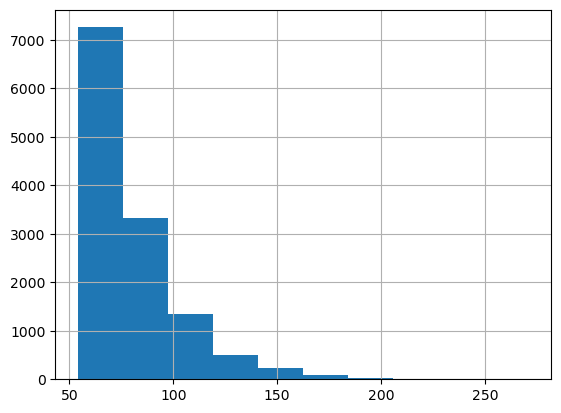

In [92]:
#verificando dados com histograma
long_days['days_listed'].hist();

In [93]:
#Verificando a distribuição de anúncios de dias longos
long_days['days_listed'].describe()

count    12807.000000
mean        78.781135
std         24.294534
min         54.000000
25%         61.000000
50%         72.000000
75%         89.000000
max        271.000000
Name: days_listed, dtype: float64

Podemos ver a média que se encontra em 78 dias e no máximo 271 dias de postagem até sua retirada

## Média de preços por cada tipo de veículo

[Analise o número de propagandas e o preço médio para cada tipo de veículo. Construa um gráfico mostrando a dependência do número de propagandas em relação ao tipo de veículo. Selecione os dois tipos com os maiores números de propagandas.]

In [94]:
#Agrupando os dados para análise dos tipos de veículos e suas médias
dfdays_list.groupby('type').agg({'price': 'mean','days_listed':'mean'}).reset_index()\
                  .rename(columns={'type':'Modelo Carro','price': 'Preço Médio'})

,Modelo Carro,Preço Médio,days_listed
0,SUV,11165.861962,36.677495
1,bus,17135.666667,43.500000
2,convertible,14532.709977,36.039443
3,coupe,14386.433843,36.019352
4,hatchback,6862.652860,37.527613
5,mini-van,8207.729560,35.758311
6,offroad,14368.757282,36.436893
7,other,10956.284000,36.160000
8,pickup,16052.258298,36.580912
9,sedan,6964.345215,36.441940


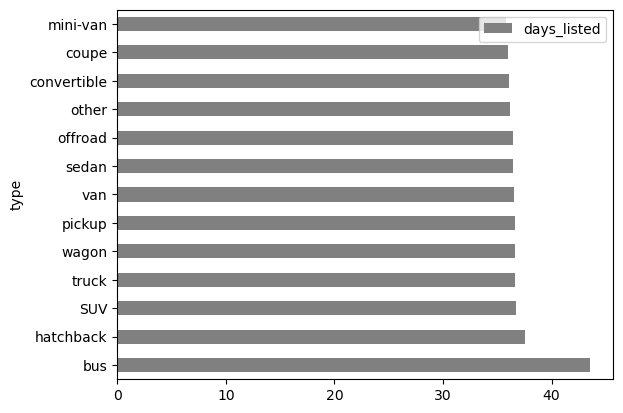

In [95]:
#Plotando gráfico com médias
dfdays_list.pivot_table(index= 'type', values='days_listed',aggfunc='mean')\
                        .sort_values('days_listed',ascending=False).plot(kind='barh',color='grey');

In [96]:
df_aux = dfdays_list.groupby('type').agg({'price': 'mean','days_listed':'count'}).reset_index()\
                  .rename(columns={'type':'Modelo Carro','price': 'Preço Médio'})
df_aux

,Modelo Carro,Preço Médio,days_listed
0,SUV,11165.861962,11975
1,bus,17135.666667,24
2,convertible,14532.709977,431
3,coupe,14386.433843,2222
4,hatchback,6862.652860,1014
5,mini-van,8207.729560,1113
6,offroad,14368.757282,206
7,other,10956.284000,250
8,pickup,16052.258298,6779
9,sedan,6964.345215,11755



Podemos perceber que a relação tipo veículo versus dias de propagandas, possuem uma forte relação em torno de 36 dias de publicação, sendo que para o tipo “bus” temos a maior média dentro do grupo

## Fatores de preço

[Quais fatores impactam mais o preço? Pegue cada um dos tipos populares que você detectou no estágio anterior e estude se o preço depende da idade, quilometragem, condição, tipo de transmissão e cor. Para variáveis categóricas (tipo de transmissão e cor), construa gráficos de extremos e quartis, e crie gráficos de dispersão para o restante. Quando analisar variáveis categóricas, perceba que as categorias devem ter pelo menos 50 propagandas, caso contrário, seus parâmetros não serão válidos para analisar.]

[Faça uso da matriz de correlação e gráficos de correlação]

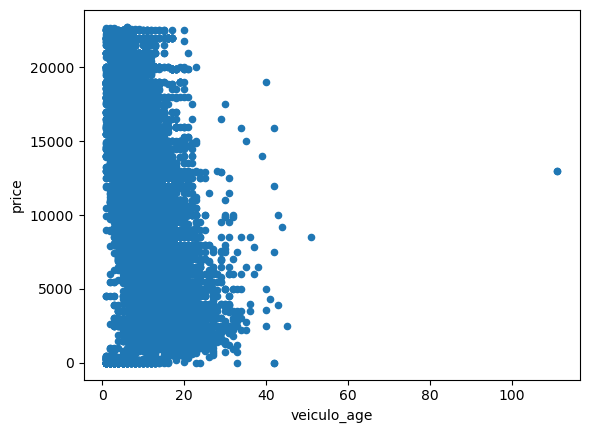

In [97]:
#analisando os tipos de carros mais populares em relação a preço
df_price[df_price['type'].isin(['SUV','truck'])].plot.scatter(x='veiculo_age',y='price');

Analisando as variáveis para este dois tipos de carros mais populares (SUV,truck), percebemos que a idade do carro influencia em seu preço

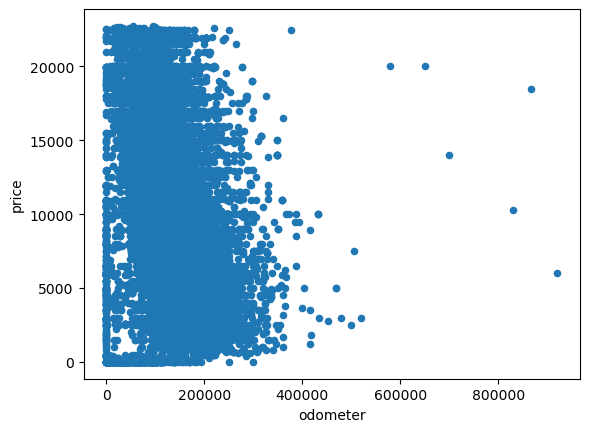

In [98]:
#analisando a distribuição por quilometragem e preço
df_price[df_price['type'].isin(['SUV','truck'])].plot.scatter(x='odometer',y='price');

Podemos perceber que as cores White, Black, Blue, Silver,Grey, são as que mais tem relação com o valor maior do preço dos veículos.

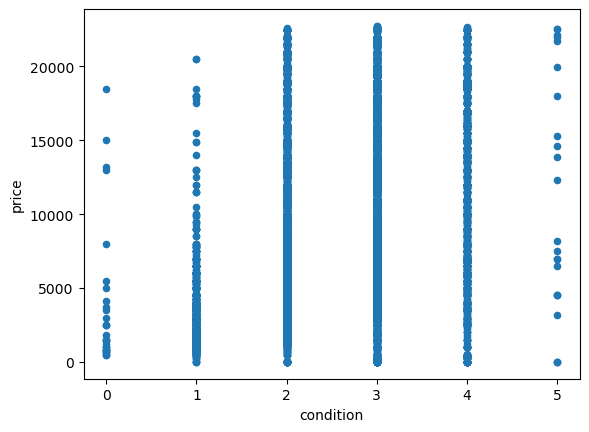

In [99]:
#verificando a avaliação
df_price[df_price['type'].isin(['SUV','truck'])].plot.scatter(x='condition',y='price');

Dentro das condições do veículo e seu preço podemos perceber que as melhores avaliações (good,excellent,like new), possuem os picos de valores em seus preços.

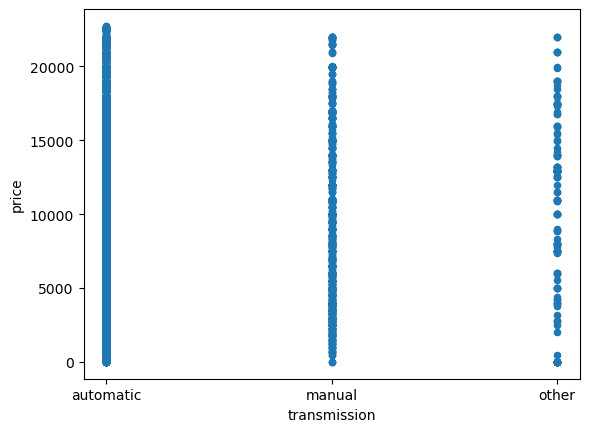

In [100]:
#Verificando a transmissão
df_price[df_price['type'].isin(['SUV','truck'])].plot.scatter(x='transmission',y='price');

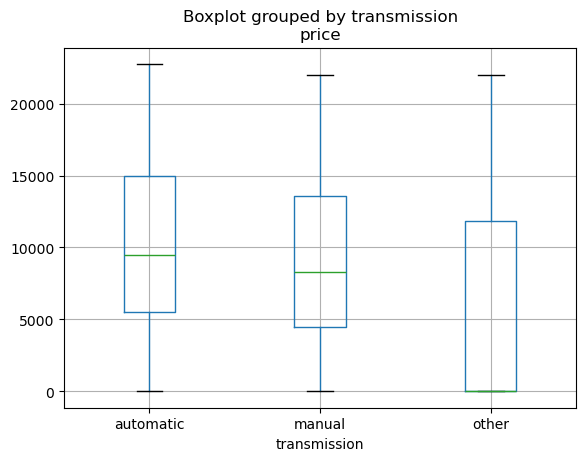

In [101]:
df_price[df_price['type'].isin(['SUV','truck'])].boxplot('price',by ='transmission');

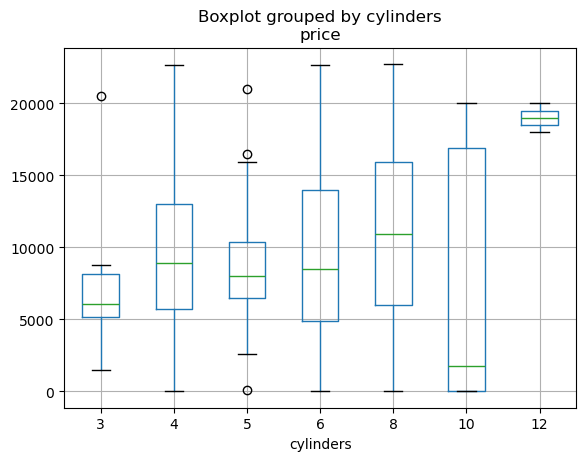

In [102]:
df_price[df_price['type'].isin(['SUV','truck'])].boxplot('price',by ='cylinders');

## Conclusão geral

[Liste suas conclusões importantes nessa seção final, certifique-se que eles incluem aqueles que te levaram à forma como você processou e analisou os dados. Aborde valores ausentes, duplicados, valores atípicos e possíveis razões e soluções para artefatos problemáticos que você teve que direcionar. Não se esqueça de remover todos os comentários entre chaves antes de entregar seu projeto.]

Verificamos que as características que mais tem uma forte relação com o preço do veículo, são idade do auto, quilometragem e condição.

Conforme o veículo tem ultrapassa médias de quilometragem e anos de idade seu preço fica depreciado, o que podemos sugerir dentro desta análise é perceber este comportamento de cada tipo de automóvel para encontrar o melhor momento para a venda e/ou troca do carro e resguardar mais capital nesta negociação, não ultrapassando certos limites de utilização e anos, ajudam a manter a condição do auto e realizar uma melhor venda.

O indicador de dias de anúncio embasa até ≅ 30 dias a realização das maioria das vendas, o que também sugere que caso estes tipos de autos em boas condições de estado, dentro da quilometragem e ano, tende a serem vendidos neste prazo, caso seja ultrapassado, sugerimos realizar uma revisão no anúncio para detectar algo que possa realizar para adequar a este perfil.

Fatores de transmissão e cor também são relevantes, para venda do carro, podemos verificar que carros automáticos e nas cores White, Black, Blue, Silver,Grey, são mais procurados, podemos sugerir uma avaliação de preço baseado nestes fatores que mais valorizem a venda destes veículos, orientando melhor o cliente final.

Quero passar aqui só para parabenizar o revisor que a maneira que ele abordou os erros me encorajou a buscar a melhorar ,muito obrigado pelo apoio!

In [103]:
df.to_csv('vehicles_us_clean.csv', index=False)